**Linear Regression california house price predictions using scikit-learn,keras and Neural Network**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load california housing dataset
california = fetch_california_housing()
X =pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

#Combine feature and data for exploration
df = pd.concat([X, pd.Series(y, name='MedHouseVal')], axis=1)
print("\nFirst five rows of datset :")
df.head()


First five rows of datset :


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Here is a **short, clear explanation** you can put in your Colab text
### 📝 Why we use `df.info()` in our code

`df.info()` gives a quick overview of the dataset’s structure. It shows:

* **Column names**
* **Number of rows**
* **Data types of each feature**
* **How many missing values each column has**
* **Memory usage**

This helps us understand:

* whether any columns need **type conversion** (e.g., float ↔ int)
* which features might need **imputation** because of missing values
* if the dataset is loaded **correctly** before starting EDA or preprocessing

In simple words:
➡️ **`df.info()` is used to quickly inspect the dataset so we know what cleaning or preprocessing is needed.**



In [4]:
print("Dataset Info: ")
df.info()


Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
print("Shape of dataset:", df.shape)

Shape of dataset: (20640, 9)



### 📝 Why we use `df.describe()` in our code

`df.describe()` provides key **summary statistics** for all numerical columns, including:

* **mean**
* **median (50% percentile)**
* **min & max values**
* **standard deviation**
* **25% and 75% percentiles**

This helps us quickly understand:

* the **distribution** of each feature
* whether any values look **unusual or extreme** (outliers)
* the **scale** of the features (useful before normalization or standardization)
* if the dataset is **balanced** or skewed

In simple words:
➡️ **`df.describe()` gives a quick statistical summary to help us check data quality and plan preprocessing.**




In [6]:
print("Summary statistics:\n")
df.describe()

Summary statistics:



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


from matplotlib import pyplot as plt
_df_0['MedInc'].plot(kind='hist', bins=20, title='MedInc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['HouseAge'].plot(kind='hist', bins=20, title='HouseAge')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['AveBedrms'].plot(kind='hist', bins=20, title='AveBedrms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='MedInc', y='HouseAge', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='HouseAge', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AveRooms', y='AveBedrms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='AveBedrms', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['HouseAge'].plot(kind='line', figsize=(8, 4), title='HouseAge')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['AveBedrms'].plot(kind='line', figsize=(8, 4), title='AveBedrms')
plt.gca().spines[['top', 'right']].set_visible(False)

Nice — below is a **clean, robust, copy-pasteable update** of your plotting code plus a **line-by-line explanation**. The updated version:

* automatically computes the grid size (rows × columns)
* uses `plt.subplots()` (better practice than many `plt.subplot()` calls)
* hides any unused subplots
* sets a sensible default `bins` value
* keeps `kde=True` so you get both histogram + density


### 📝 Line-by-line explanation

1. `import numpy as np`

   * Import NumPy for numeric utilities (used to compute rows/cols).

2. `import matplotlib.pyplot as plt`

   * Import Matplotlib's plotting interface.

3. `import seaborn as sns`

   * Import Seaborn for nicer statistical plots (histogram + KDE).

4. `n_features = len(X.columns)`

   * Count how many feature columns you have (so the code adapts if you add/remove features).

5. `n_cols = 3`

   * Choose how many columns you want in the subplot grid. Change this to `2`, `4`, etc., depending on how wide you want the layout.

6. `n_rows = int(np.ceil(n_features / n_cols))`

   * Compute the number of rows required to fit all features. `np.ceil` ensures we round up so every feature has a subplot.

7. `fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows))`

   * Create the figure and a grid of axes (subplots). `figsize` scales with the grid so plots aren't cramped.

8. `axes = axes.flatten()`

   * Convert the 2D `axes` array into a flat 1D array — easier for single-loop iteration.

9. `for i, col in enumerate(X.columns):`

   * Loop over each feature column (index `i`, column name `col`).

10. `sns.histplot(df[col], kde=True, bins=30, ax=axes[i])`

    * Draw a histogram of the column values on the `i`-th axis.
    * `kde=True` overlays a smooth density estimate.
    * `bins=30` controls histogram resolution; change if needed.
    * `ax=axes[i]` directs the plot to the correct subplot.

11. `axes[i].set_title(f"Distribution of {col}")`

    * Set a readable title for each subplot (shows the feature name).

12. `axes[i].set_xlabel("")`

    * Optionally clear the x-axis label text for a cleaner look (useful when many subplots).

13. `for j in range(n_features, len(axes)):`

    * If the grid has more subplot slots than features, iterate over the extra axes indexes.

14. `axes[j].set_visible(False)`

    * Hide unused axes so there are no empty plots with ticks.

15. `plt.tight_layout()`

    * Adjust spacing so titles and axes don't overlap.

16. `plt.show()`

    * Render the figure.


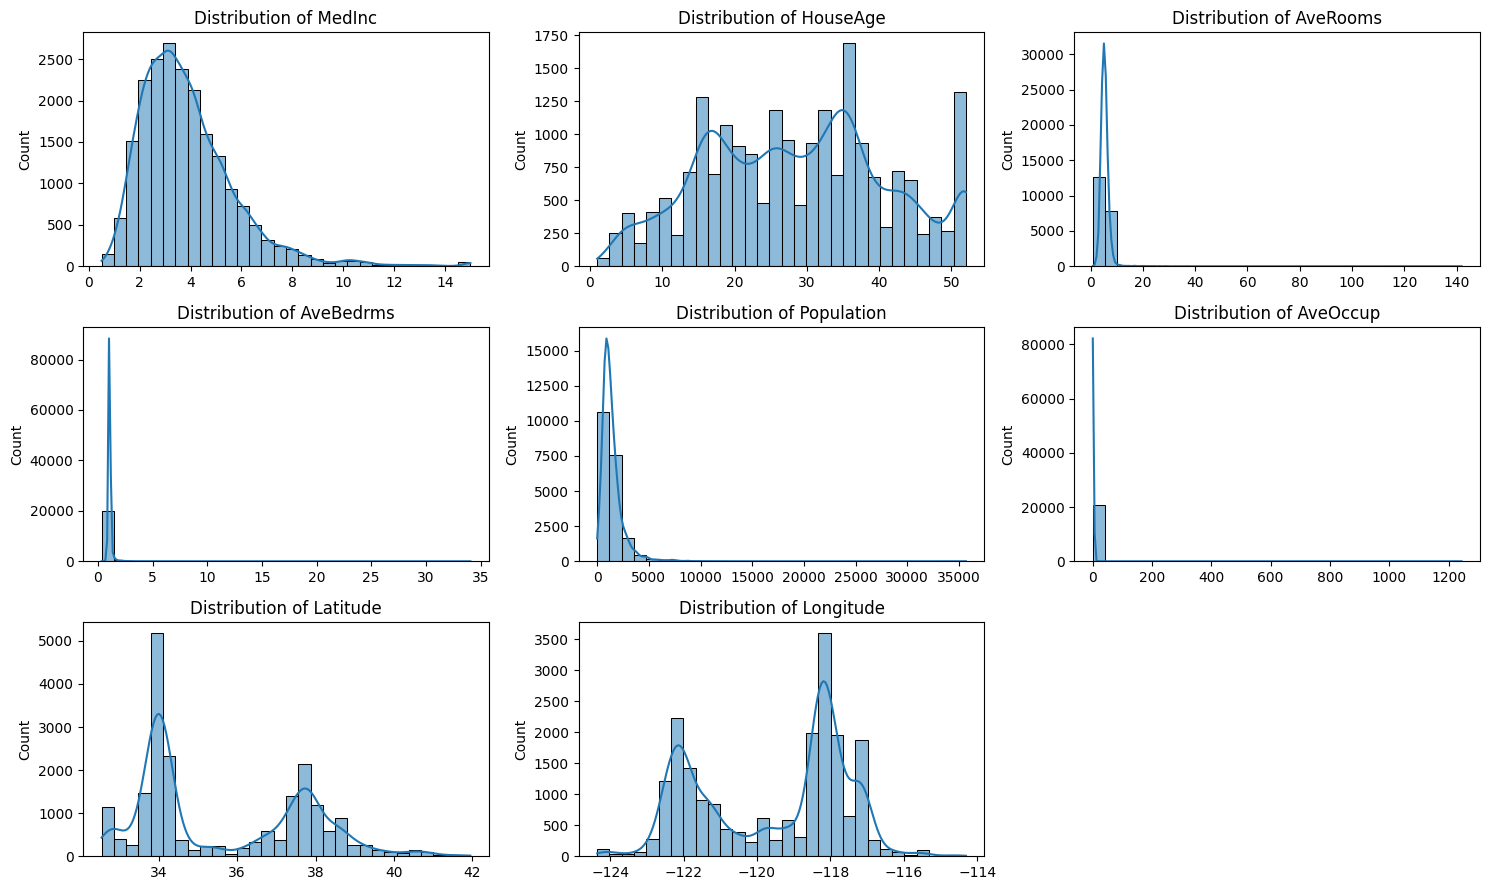

In [9]:

# number of features to plot
n_features = len(X.columns)

# layout: 3 columns (you can change this to 2, 4, etc.)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

# create the figure and axes grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows))
axes = axes.flatten()  # flatten so we can iterate in one loop

# loop over columns and plot each distribution
for i, col in enumerate(X.columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")   # optional: remove x-label for cleaner look

# hide any unused subplots (if n_rows*n_cols > n_features)
for j in range(n_features, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


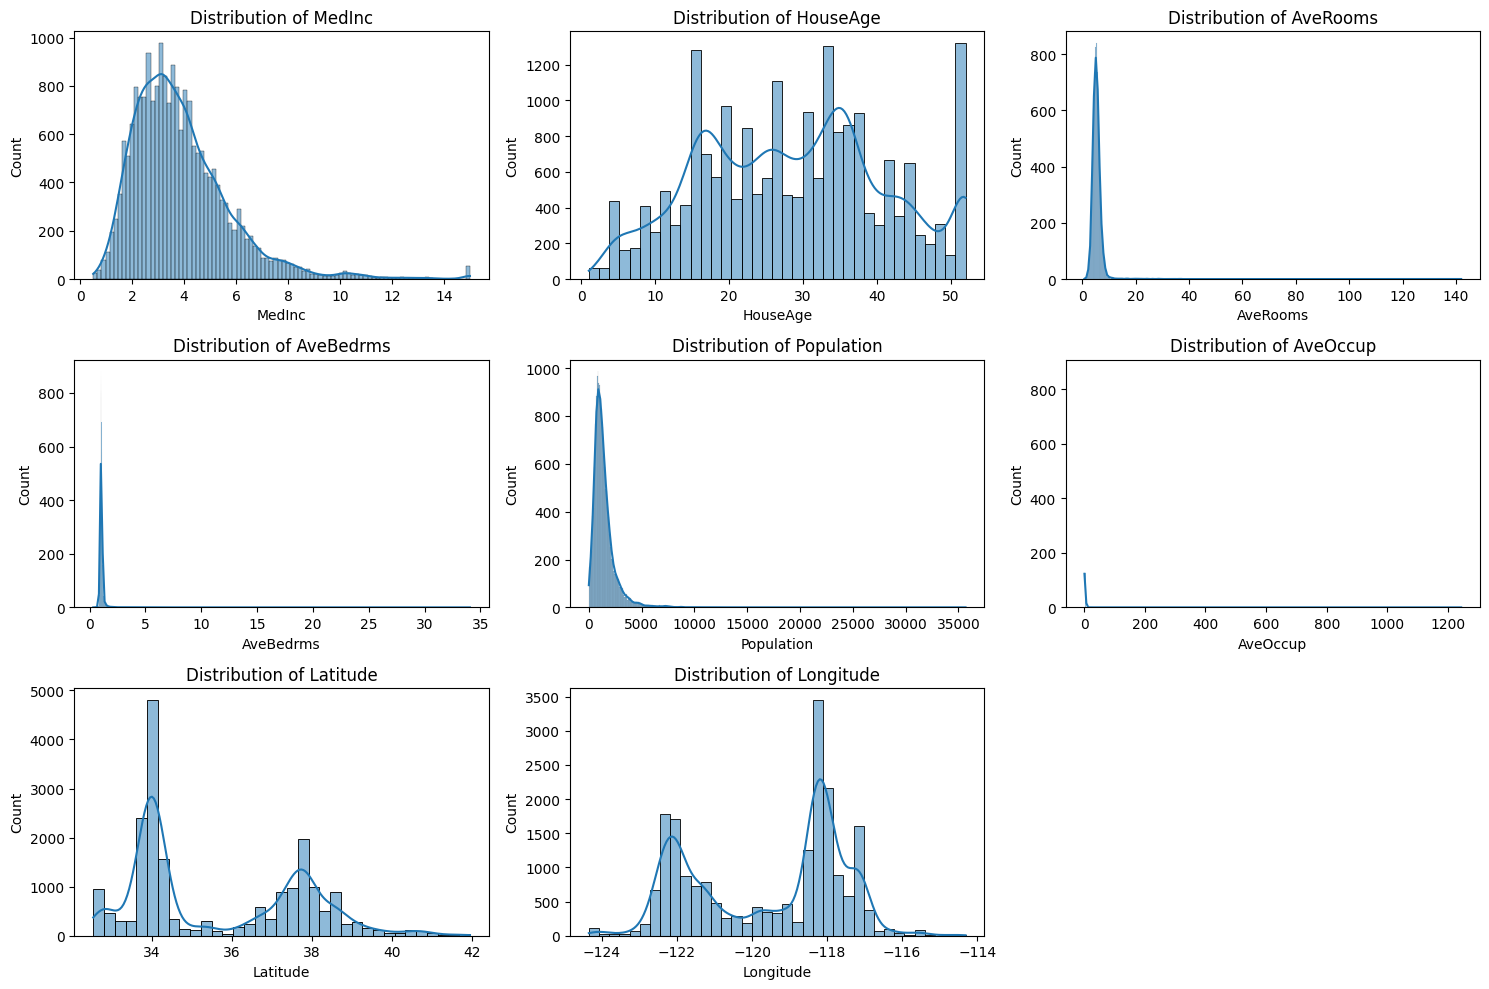

In [8]:
#Optional because this and prevoius are same
#Visualize feature distributions
plt.figure(figsize=(15,10))
for i,col in enumerate(X.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## 📝 Why we plot the distribution of the target variable?

Before training any regression model, we must understand how the **target variable** (here: *Median House Value*) is distributed.
Plotting the distribution helps us see:

* whether the target is **skewed** (common in housing prices)
* whether there are **outliers** that may affect model performance
* if we need **transformation** (log scaling) before training
* the overall **range** of house prices

In simple words:
➡️ **We use this plot to understand the shape of the target variable so we can choose better preprocessing and modeling techniques.**




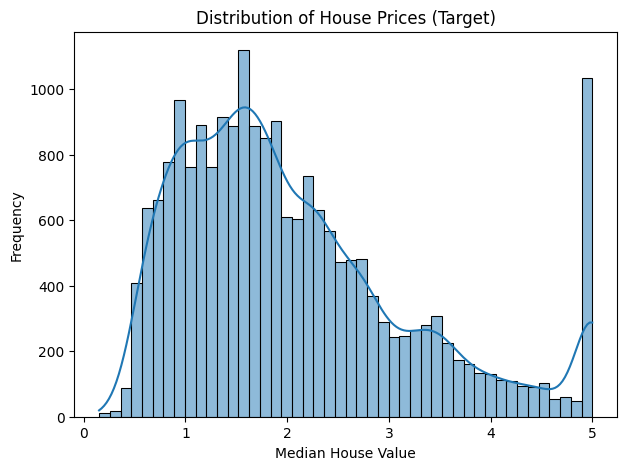

In [12]:
# Distribution of target (Median House Value)
plt.figure(figsize=(7,5))
sns.histplot(df["MedHouseVal"], kde=True)
plt.title("Distribution of House Prices (Target)")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()


## 📝 Why we use a correlation heatmap?

A **correlation heatmap** shows how strongly each feature is related to:

* **other features** (to detect multicollinearity)
* **the target variable** (to see which features are useful for prediction)

This helps us:

* identify **important predictors**
* detect **highly correlated features** that may cause problems in linear models
* decide whether we need **feature selection** or **dimensionality reduction**
* understand patterns or relationships inside the data

In simple words:
➡️ **The heatmap helps us visually check which features are useful and which ones may create redundancy or noise.**

If you want, I can also generate:

✔ Heatmap with annotated correlation values
✔ Heatmap sorted by correlation with target
✔ Explanation of multicollinearity and how to fix it (VIF, PCA)

Just tell me!


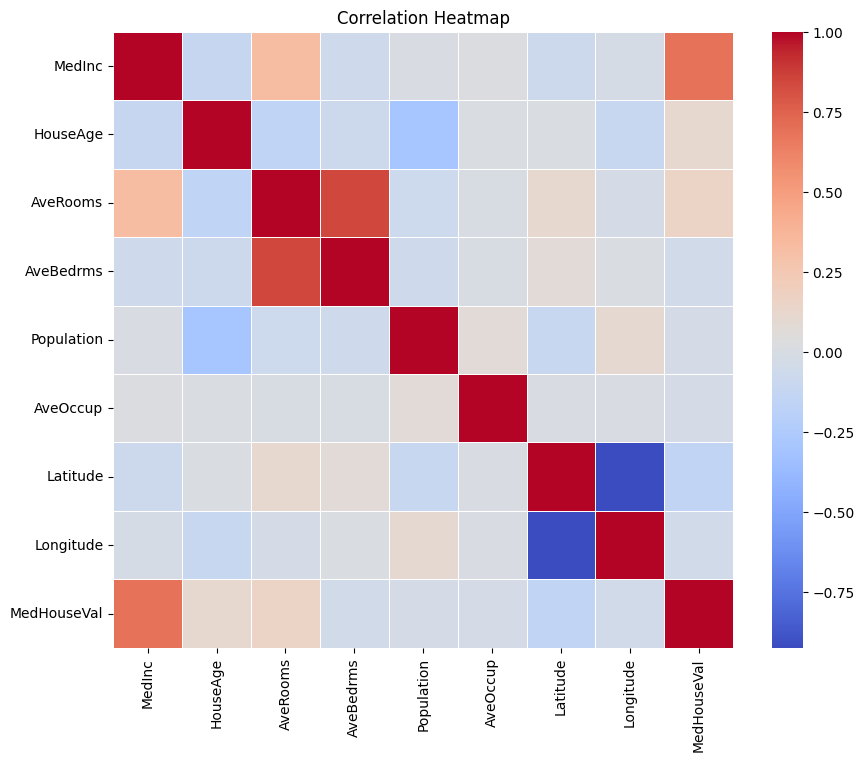

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()        # compute correlation matrix
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# 📝 What does “Testing Assumptions of Linear Regression” mean?

Linear Regression models work correctly **only when certain assumptions are satisfied**.
These assumptions help ensure that:

* predictions are accurate
* coefficients are reliable
* errors are stable and unbiased

Below is the meaning of each assumption in simple language:

---

### **1. Linearity — The relationship between features and target is linear**

This means:

* The target (y) changes proportionally with the features (X).
* A straight line (or plane) should fit the relationship well.

If the relationship is curved or non-linear, linear regression becomes inaccurate.

---

### **2. Independence — Observations are independent**

This means:

* Each data point must not influence another.
* No autocorrelation (especially important in time-series data).

If observations depend on each other, residuals become biased.

---

### **3. Homoscedasticity — Constant variance of residuals**

This means:

* The spread of residuals (errors) should be **constant** for all levels of prediction.
* No “funnel shape” patterns in residuals.

If variance increases or decreases, it indicates heteroscedasticity.

---

### **4. Normality — Residuals are normally distributed**

This means:

* The errors should follow a **bell-shaped distribution**.
* Important for accuracy of confidence intervals and hypothesis tests.

Not required for prediction but important for statistical interpretation.

---

### **5. No Multicollinearity — Features are not highly correlated**

This means:

* Predictors should not have very strong relationships with each other.
* Otherwise, the model cannot correctly estimate their individual effects.

High multicollinearity leads to unstable coefficients.

---

### ✔ In simple words:

> Linear regression works best when:
> features relate linearly to the target, data points don’t depend on each other,
> errors behave nicely (constant spread, normally distributed),
> and features aren’t too similar to each other.

---

If you want, I can generate Python code to **test all 5 assumptions** using:

* residual plots
* QQ plot
* VIF scores for multicollinearity
* Breusch-Pagan test
* Durbin-Watson test

Just tell me!


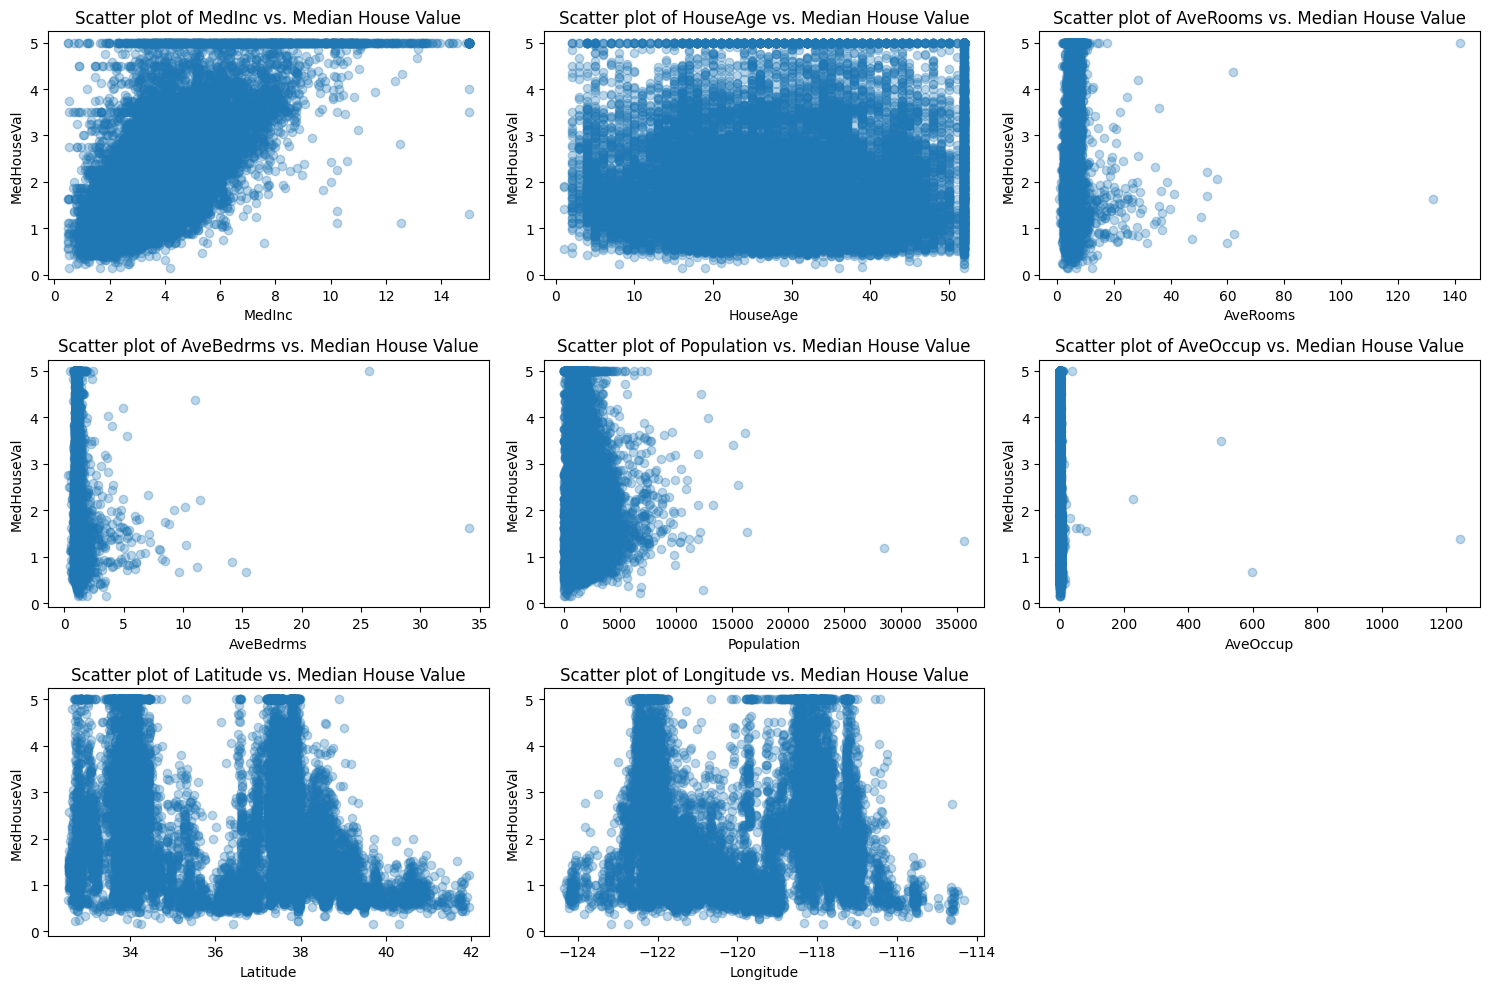

In [16]:
# ------------------------------------------------------------
# We create scatter plots to visually check the LINEARITY assumption.
# Linearity means each feature should have a roughly straight-line
# relationship with the target variable (MedHouseVal).
# ------------------------------------------------------------

# Create a large figure to fit all plots nicely
plt.figure(figsize=(15, 10))

# Loop through all feature columns in X
for i, col in enumerate(X.columns, 1):

    # Select the position of subplot (3 rows × 3 columns)
    plt.subplot(3, 3, i)

    # Scatter plot of feature vs. target
    # alpha=0.3 makes points transparent → helps see patterns clearly
    plt.scatter(df[col], df['MedHouseVal'], alpha=0.3)

    # Label the x-axis with feature name
    plt.xlabel(col)

    # Label the y-axis with target variable
    plt.ylabel('MedHouseVal')

    # Title explaining what the plot shows
    plt.title(f"Scatter plot of {col} vs. Median House Value")

# Adjust spacing between plots (prevents overlap)
plt.tight_layout()

# Show the entire grid of scatter plots
plt.show()


In [17]:
#Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n Variance Inflation Factor (VIF) :")
print(vif_data)


 Variance Inflation Factor (VIF) :
      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [18]:
# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

# FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# BUILD NEURAL NETWORK MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)   # output layer, regression → no activation
])

In [25]:
model.compile(optimizer="adam", loss="mse",metrics=["mae"])

In [26]:
# TRAIN MODEL
history = model.fit( X_train_scaled, y_train, validation_split=0.2, epochs=20,batch_size=32)


Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 1.9064 - mae: 0.9398 - val_loss: 0.5139 - val_mae: 0.5141
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.4483 - mae: 0.4789 - val_loss: 0.4462 - val_mae: 0.4805
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3851 - mae: 0.4407 - val_loss: 0.3944 - val_mae: 0.4387
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3638 - mae: 0.4278 - val_loss: 0.3862 - val_mae: 0.4320
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3498 - mae: 0.4194 - val_loss: 0.3682 - val_mae: 0.4239
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3345 - mae: 0.4082 - val_loss: 0.3556 - val_mae: 0.4197
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3278 - mae: 0.4021 - val_loss: 0.3442 - val_mae: 0.4060
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3447 - mae: 0.4018 - val_loss: 0.3415 - val_mae: 0.4031
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - l

In [29]:
# MODEL EVALUATION
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n**Model Evaluation**")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

**Model Evaluation**
MAE: 0.3739569664498725
MSE: 0.29743595346540525
RMSE: 0.5453768912095609
R² Score: 0.7730205161867214


In [31]:
# PREDICT ON NEW SAMPLE
new_data = pd.DataFrame({
    "MedInc": [7.2],
    "HouseAge": [30],
    "AveRooms": [6.5],
    "AveBedrms": [1.0],
    "Population": [800],
    "AveOccup": [3.0],
    "Latitude": [34.2],
    "Longitude": [-118.4]
})

new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

print("\n Predicted House Price (in 100k USD):", prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

 Predicted House Price (in 100k USD): 3.6291091
